# Poojahira's version

In [6]:
import os
import numpy as np
import torch
import gc
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
plt.style.use("seaborn")

dir_path = os.path.abspath('')
os.chdir(dir_path)

In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [8]:
%reload_ext autoreload
%autoreload 2

## Data preparation

### Creation of files kdf5 for Flickr30k

In [4]:

os.remove('train_flickr.hdf5')
os.remove('val_flickr.hdf5')


FileNotFoundError: [WinError 2] The system cannot find the file specified: 'train_flickr.hdf5'

In [ ]:

%run bottom-up_features/tsv.py

### Create input files

In [ ]:
%run utils.py

create_input_files(dataset='flickr30k',
                       karpathy_json_path='data/caption_datasets/dataset_flickr30k.json',
                       captions_per_image=5,
                       min_word_freq=5,
                       output_folder='final_dataset_flickr',
                       max_len=50)

### Training

In [ ]:
import gc
import torch

In [ ]:
torch.cuda.empty_cache()
gc.collect()

In [ ]:
%run train.py

### Plotting the metrics obtained during training

#### With the COCO dataset (First 2 epochs)

In [ ]:
# 12 scores =1 epoch
losses_train_coco = [79.5072,33.3733,29.2574,27.1445,24.9402,13.3282,12.6251,12.6628,12.1809,13.1595,12.5314,10.9447,\
                     12.0483,10.8319,11.1864,9.8083,15.1406,10.5921,9.8913,10.1091,9.3261,9.3010,9.2150,9.4022]
TOP5_train_coco = [0,42.62,42.97,53.78,56.70,58.80,59.98,61.31,62.08,60.26,62.01,64.91,63.06,63.19,64.71,67.48,61.92,\
                  65.25,67.58,67.85,64.86,69.39,68.69,67.62]

# 1 score =1 epoch
losses_val_coco = [11.089,9.102]
TOP5_val_coco = [62.253,70.017]
bleu4_coco = [0.1586,0.1865]

#### With the Flickr30k dataset

In [ ]:
# 3 scores =1 epoch
losses_train=[55.7508,27.0235,24.8475,21.9339,21.5795,21.2167,17.7418,19.7684,18.9307,19.7181,18.8761,17.2881,\
              14.5299,16.1297,15.8459,15.1970,14.9896,14.8008,14.8987,14.1792,14.0222,13.3480,13.4956,13.4105,\
             12.8728,12.9942,12.9247,11.2827,12.7451,12.6616,13.5882,12.4613,12.4397,12.3680,12.3207,12.2523,\
             13.0488,12.1786,12.1084,11.2593,11.9003,11.9656,11.3007,11.8308,11.8611,10.7827,11.8212,11.7747,\
             10.5470,11.6950,11.6772,11.7703,11.6244,11.6190,12.2151,11.6299,11.5497,11.7919,11.5064,11.5162]
TOP5_train=[0,39.241,43.871,44.274,47.640,46.973,50.076,51.5,54.635,51.743,54.519,54.945,57.862,60.046,58.517,\
           59.097,58.523,58.797,59.515,59.856,60.089,61.155,60.929,61.116,62.221,62.111,62.208,66.395,62.836,\
           62.949,62.545,63.564,63.591,62.54,64.236,64.242,66.288,64.670,64.822,66.950,65.412,65.350,67.312,\
           65.872,65.859,66.881,66.0924,66.229,66.843,66.683,66.791,65.481,67.150,67.134,67.627,67.468,67.506,\
           66.951,67.814,67.756]

# 1 score =1 epoch
losses_val=[27.419,22.328,19.511,16.834,14.896,14.016,13.142,12.715,12.481,12.22,12.139,12.168,11.838,11.918,11.927,\
           11.703,11.904,11.908,11.695,11.699]
TOP5_val=[47.219,52.393,55.714,58.472,59.824,61.062,61.877,62.692,63.373,63.8,64.412,64.809,65.287,65.560,65.878,\
         66.132,66.315,66.629,66.718,66.574]
bleu4=[0.0755,0.1003,0.1119,0.1183,0.1304,0.1273,0.137,0.1378,0.1361,0.1417,0.1454,0.1494,0.1455,0.1499,0.1522,\
      0.155,0.1534,0.1577,0.1589,0.156]


In [ ]:
# Ranges to match the batches and epochs (3 batches hence loss_train result per epoch)
n_epochs_coco=2
n_epochs_flickr=20

epochs=np.arange(1,n_epochs_coco+n_epochs_flickr+1)
batches= list(np.arange(1,12*n_epochs_coco+1)/12) + list(np.arange(1+3*n_epochs_coco,3*n_epochs_flickr+1+3*n_epochs_coco)/3)

#### Loss

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Evolution of the loss",fontsize=16)

plt.plot(batches,losses_train_coco+losses_train,alpha=0.7,label="Training")
plt.plot(epochs,losses_val_coco+losses_val,color='orange',label="Validation")


# Line to separate when we switched from COCO to Flickr30k + annotations
plt.axvspan(0, 2, alpha=0.1, color='red')
plt.axvspan(2, max(epochs), alpha=0.1, color='green')
plt.annotate('On COCO dataset', xy =(0, 0.99*np.max(losses_train_coco)), xycoords='data',\
             bbox =dict(boxstyle="square,pad=0.5", ec=(1., 1., 1.),fc=(0.8, 0.5, 0.5),alpha=0.7))
plt.annotate('On Flickr30k dataset', xy =(10, 0.99*np.max(losses_train_coco)), xycoords='data',\
             bbox =dict(boxstyle="square,pad=0.5", ec=(1., 1., 1.),fc=(0.5, 0.8, 0.5),alpha=0.5))


# Set axis
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.axes().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.axes().set(xlim=(-0.5, max(epochs)+0.5))

plt.legend()
plt.show()

#### TOP-5 accuracy metric

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Evolution of the TOP-5 accuracy metric",fontsize=16)

plt.plot(batches,TOP5_train_coco+TOP5_train,alpha=0.7,label="Training")
plt.plot(epochs,TOP5_val_coco+TOP5_val,color='orange',label="Validation")


# Line to separate when we switched from COCO to Flickr30k + annotations
plt.axvspan(0, 2, alpha=0.1, color='red')
plt.axvspan(2, max(epochs), alpha=0.1, color='green')
plt.annotate('On COCO dataset', xy =(0, 0.99*np.max(TOP5_train_coco)), xycoords='data',\
             bbox =dict(boxstyle="square,pad=0.5", ec=(1., 1., 1.),fc=(0.8, 0.5, 0.5),alpha=0.7))
plt.annotate('On Flickr30k dataset', xy =(10, 0.99*np.max(TOP5_train_coco)), xycoords='data',\
             bbox =dict(boxstyle="square,pad=0.5", ec=(1., 1., 1.),fc=(0.5, 0.8, 0.5),alpha=0.5))


# Set axis
plt.ylabel("TOP-5 accuracy")
plt.xlabel("Epoch")
plt.axes().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.axes().set(xlim=(-0.5, max(epochs)+0.5))

plt.legend()
plt.show()

#### BLEU-4 metric

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Evolution of the BLEU-4 metric",fontsize=16)

plt.plot(epochs,bleu4_coco+bleu4,color='orange',label="Validation")


# Line to separate when we switched from COCO to Flickr30k + annotations
plt.axvspan(0, 2, alpha=0.1, color='red')
plt.axvspan(2, max(epochs), alpha=0.1, color='green')
plt.annotate('On COCO dataset', xy =(0, 0.99*np.max(bleu4_coco)), xycoords='data',\
             bbox =dict(boxstyle="square,pad=0.5", ec=(1., 1., 1.),fc=(0.8, 0.5, 0.5),alpha=0.7))
plt.annotate('On Flickr30k dataset', xy =(10, 0.99*np.max(bleu4_coco)), xycoords='data',\
             bbox =dict(boxstyle="square,pad=0.5", ec=(1., 1., 1.),fc=(0.5, 0.8, 0.5),alpha=0.5))


plt.ylabel("BLEU-4 score")
plt.xlabel("Epoch")
plt.axes().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.axes().set(xlim=(-0.5, max(epochs)+0.5))

plt.legend()
plt.show()

In [ ]:
%run eval.py

{'CIDEr': 0.5243185889017987, 'Bleu_4': 0.24540300612681126, 'ROUGE_L': 0.4747543760696306, 'Bleu_1': 0.6485461441213244, 'Bleu_3': 0.3460391533900509, 'Bleu_2': 0.4818927604631453}

### Display some results obtained on validation dataset

In [9]:
torch.cuda.empty_cache()
gc.collect()

7

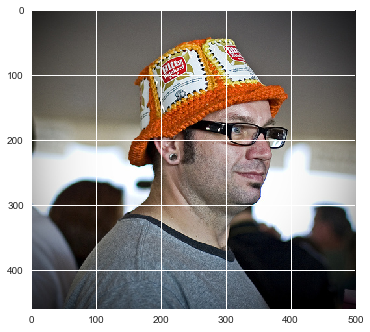

Predicted caption: a man wearing a hat and a hat
Reference captions: - the man with pierced ears is wearing glasses and an orange hat
                    - the man with pierced ears is wearing glasses and an orange hat
                    - the man with pierced ears is wearing glasses and an orange hat
                    - the man with pierced ears is wearing glasses and an orange hat
                    - the man with pierced ears is wearing glasses and an orange hat


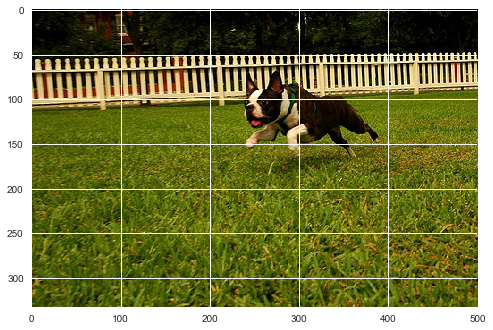

Predicted caption: a dog is running through the grass
Reference captions: - a dog runs on the green grass near a wooden fence
                    - a dog runs on the green grass near a wooden fence
                    - a dog runs on the green grass near a wooden fence
                    - a dog runs on the green grass near a wooden fence
                    - a dog runs on the green grass near a wooden fence


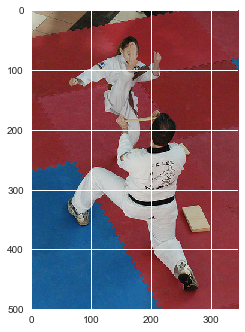

Predicted caption: a woman in a white outfit is practicing martial arts
Reference captions: - a girl breaking boards by using karate
                    - a girl breaking boards by using karate
                    - a girl breaking boards by using karate
                    - a girl breaking boards by using karate
                    - a girl breaking boards by using karate


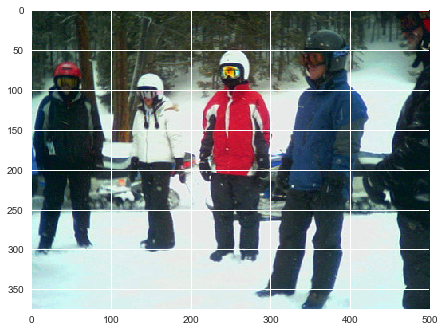

Predicted caption: a group of people are standing in the snow
Reference captions: - five snowmobile riders all wearing helmets and goggles line up in a snowy clearing in a forest in front of their snowmobiles they are all wearing black snow pants and from left to right they are wearing a black coat white coat red coat blue coat and black coat
                    - five snowmobile riders all wearing helmets and goggles line up in a snowy clearing in a forest in front of their snowmobiles they are all wearing black snow pants and from left to right they are wearing a black coat white coat red coat blue coat and black coat
                    - five snowmobile riders all wearing helmets and goggles line up in a snowy clearing in a forest in front of their snowmobiles they are all wearing black snow pants and from left to right they are wearing a black coat white coat red coat blue coat and black coat
                    - five snowmobile riders all wearing helmets and goggles line up in a

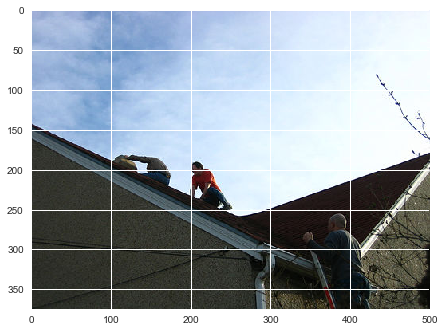

Predicted caption: two men are working on a roof
Reference captions: - people are fixing the roof of a house
                    - people are fixing the roof of a house
                    - people are fixing the roof of a house
                    - people are fixing the roof of a house
                    - people are fixing the roof of a house


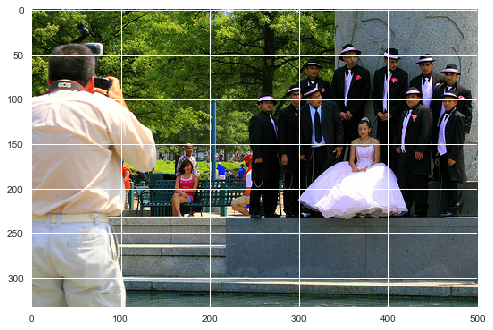

Predicted caption: a man in a white shirt is taking pictures of a group of people
Reference captions: - man taking a photograph of a well dressed group of teens
                    - man taking a photograph of a well dressed group of teens
                    - man taking a photograph of a well dressed group of teens
                    - man taking a photograph of a well dressed group of teens
                    - man taking a photograph of a well dressed group of teens


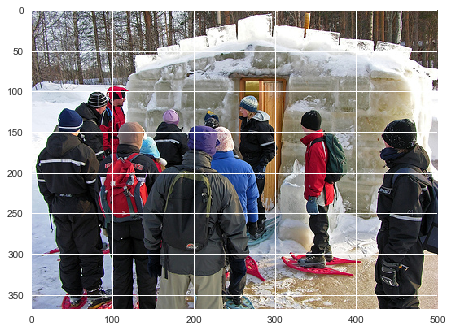

Predicted caption: a group of people are standing in the snow
Reference captions: - several students waiting outside an igloo
                    - several students waiting outside an igloo
                    - several students waiting outside an igloo
                    - several students waiting outside an igloo
                    - several students waiting outside an igloo


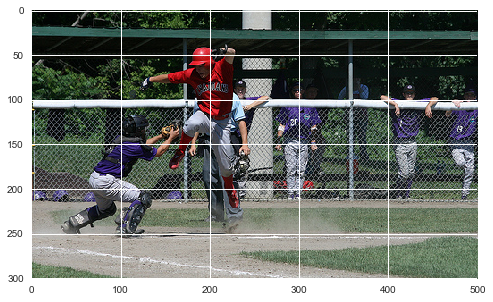

Predicted caption: a baseball player is sliding into a base
Reference captions: - a baseball player in red leaps into the air to avoid a player in blue who is <unk> behind him as he catches the ball while other blue team members look on in the background
                    - a baseball player in red leaps into the air to avoid a player in blue who is <unk> behind him as he catches the ball while other blue team members look on in the background
                    - a baseball player in red leaps into the air to avoid a player in blue who is <unk> behind him as he catches the ball while other blue team members look on in the background
                    - a baseball player in red leaps into the air to avoid a player in blue who is <unk> behind him as he catches the ball while other blue team members look on in the background
                    - a baseball player in red leaps into the air to avoid a player in blue who is <unk> behind him as he catches the ball while other blue team

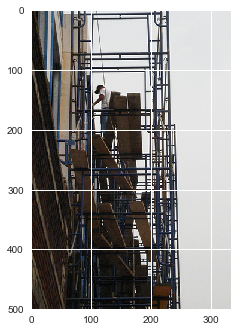

Predicted caption: a man is standing on a scaffold
Reference captions: - man works on top of scaffolding
                    - man works on top of scaffolding
                    - man works on top of scaffolding
                    - man works on top of scaffolding
                    - man works on top of scaffolding


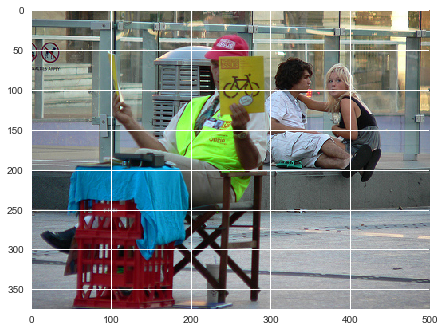

Predicted caption: a man in a green shirt is sitting on a bench reading a book
Reference captions: - a man in a vest is sitting in a chair and holding magazines
                    - a man in a vest is sitting in a chair and holding magazines
                    - a man in a vest is sitting in a chair and holding magazines
                    - a man in a vest is sitting in a chair and holding magazines
                    - a man in a vest is sitting in a chair and holding magazines


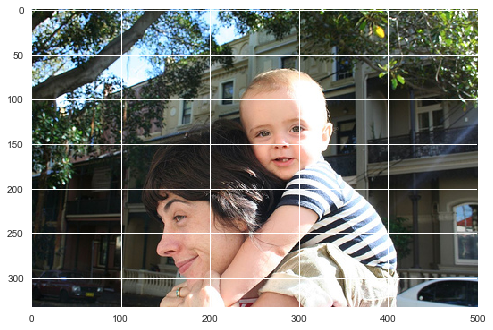

Predicted caption: a young boy in a striped shirt is holding a baby in his hand
Reference captions: - a young woman is giving a baby a ride on her shoulders
                    - a young woman is giving a baby a ride on her shoulders
                    - a young woman is giving a baby a ride on her shoulders
                    - a young woman is giving a baby a ride on her shoulders
                    - a young woman is giving a baby a ride on her shoulders
{'Bleu_3': 0.4247546002842755, 'Bleu_2': 0.5583816201199439, 'Bleu_1': 0.7130919840879018, 'CIDEr': 0.6990820682698607, 'ROUGE_L': 0.5745749217054806, 'Bleu_4': 0.3214511436369716}


In [11]:
%run display_results.py